# Import libraries

In [ ]:
# Data Manipulation and Analysis Libraries
import pandas as pd # Used for creating and manipulating DataFrames
import numpy as np  # Used for numerical operations, especially for mathematical functions like log

# Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Scikit-learn: Preprocessing and Model Selection
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV # train_test_split for splitting data, GridSearchCV/RandomizedSearchCV for hyperparameter tuning
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder # StandardScaler for feature scaling, LabelEncoder/OrdinalEncoder for encoding categorical features (though one-hot encoding is primarily used here)
from sklearn.model_selection import cross_val_score, cross_val_predict # For cross-validation techniques

# Scikit-learn: Regression Models
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV # Linear Regression for baseline, RidgeCV/LassoCV for regularized linear models to avoid overfitting with built-in cross-validation
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor # Ensemble models: Random Forest, Gradient Boosting, and Stacking (combining multiple models)

# External Gradient Boosting Libraries (often higher performance)
from xgboost import XGBRegressor       # Extreme Gradient Boosting (optimized gradient boosting)
import lightgbm as lgb                 # Light Gradient Boosting Machine (fast, high-performance gradient boosting)
from catboost import CatBoostRegressor # Categorical Boosting (handles categorical features well, fast)

# Scikit-learn: Model Evaluation Metrics
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error, mean_squared_error # Metrics to evaluate model performance: MAE, R2, RMSE, MSE

# Statistical Analysis and Utility Libraries
import statsmodels.api as sm # For statistical modeling and detailed analysis (e.g., OLS)
import time                  # For timing the execution of code blocks (e.g., model training time)
from sklearn.pipeline import Pipeline # For chaining multiple processing steps and a model into a single object

# IMPORT THE DATASET FROM CSV FILE

In [ ]:
cars_df1 = pd.read_csv(r'C:\Users\aadik\Desktop\Advance Programing\vehicles.csv')

In [ ]:
cars_df1.tail(5)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600
426879,7301591129,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,...,NaN,coupe,NaN,https://images.craigslist.org/00Y0Y_lEUocjyRxa...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:07-0600


In [ ]:
cars_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [ ]:
print(cars_df1.isnull().sum())

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64


In [ ]:
cars_df1.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

# VISUALIZATION AND DATA PROCESSING

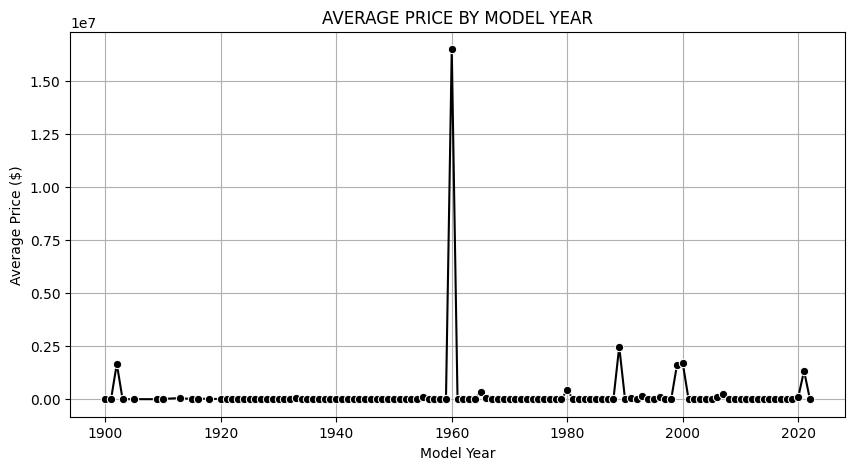

In [ ]:
#Line Plot between avg. price and model year
year_price = cars_df1.groupby('year')['price'].mean().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(x='year', y='price', data=year_price, marker='o', color='black')
plt.title('AVERAGE PRICE BY MODEL YEAR')
plt.xlabel('Model Year')
plt.ylabel('Average Price ($)')
plt.grid(True)
plt.show()

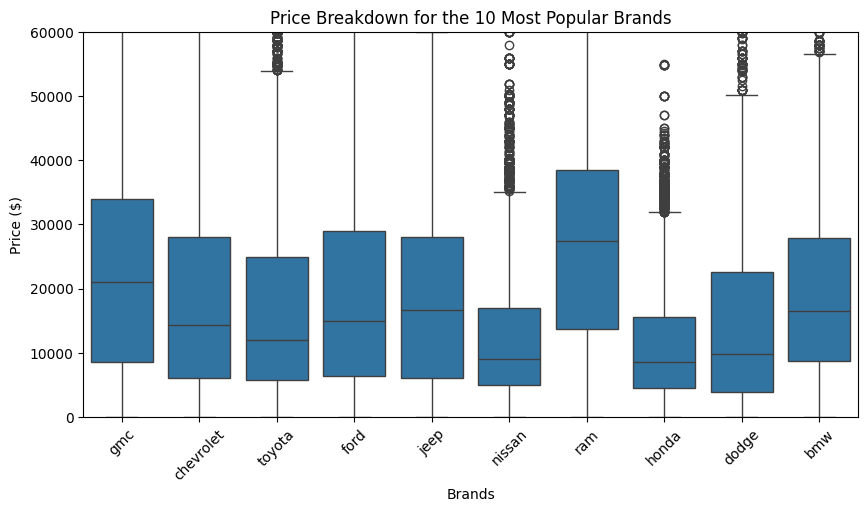

In [ ]:
#box plot between Price and Brands
top_brands = cars_df1['manufacturer'].value_counts().nlargest(10).index
df_top_brands = cars_df1[cars_df1['manufacturer'].isin(top_brands)]

plt.figure(figsize=(10,5))
sns.boxplot(x='manufacturer', y='price', data=df_top_brands)
plt.title('Price Breakdown for the 10 Most Popular Brands')
plt.xlabel('Brands')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.ylim(0, 60000)
plt.show()

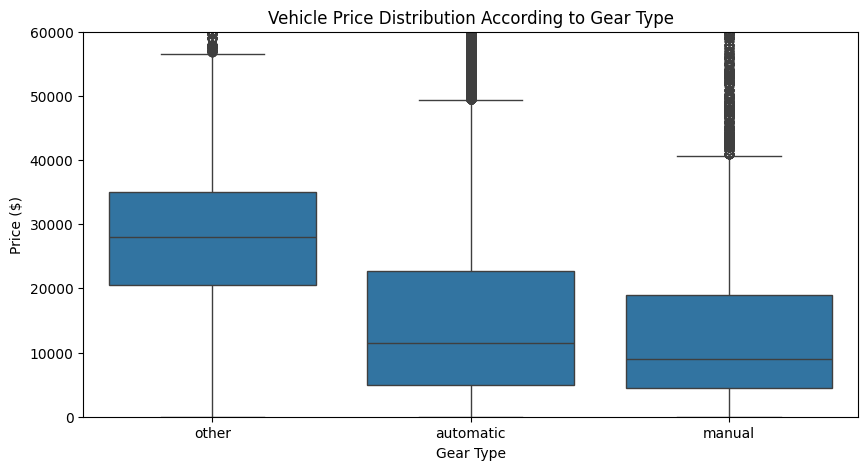

In [ ]:
#Box Plot between Gear type and Price
plt.figure(figsize=(10,5))
sns.boxplot(x='transmission', y='price', data=cars_df1)
plt.title('Vehicle Price Distribution According to Gear Type')
plt.xlabel('Gear Type')
plt.ylabel('Price ($)')
plt.ylim(0, 60000)
plt.show()

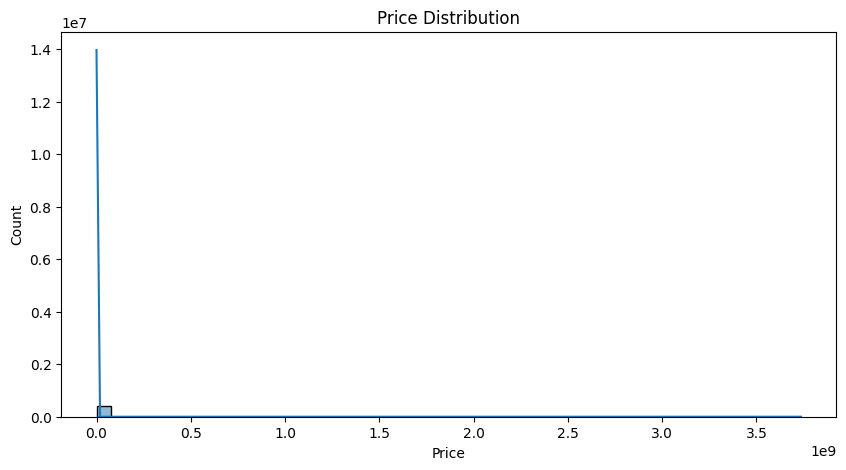

In [ ]:
#checking the price
plt.figure(figsize=(10, 5))
sns.histplot(cars_df1['price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

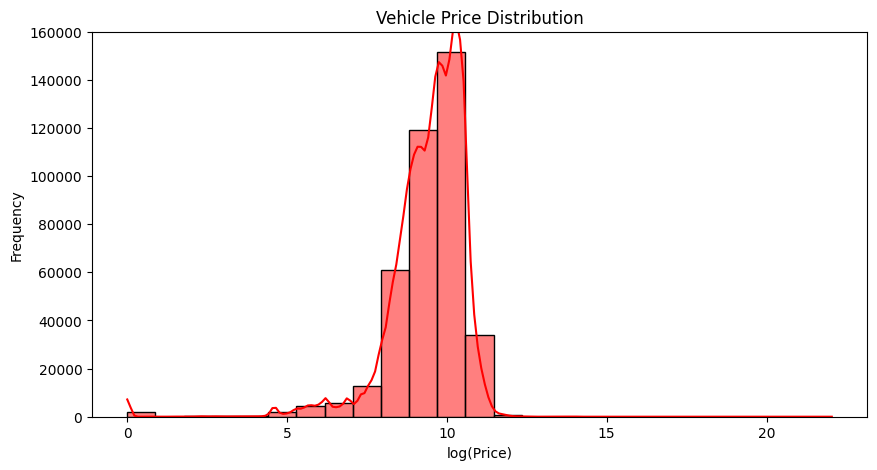

In [ ]:
#Transforming the price into log transformation with respect to frequency
df_log = cars_df1[cars_df1['price'] > 0].copy()
df_log['log_price'] = np.log(df_log['price'])

plt.figure(figsize=(10,5))
sns.histplot(df_log['log_price'], bins=25, kde=True, color='Red')
plt.title('Vehicle Price Distribution')
plt.xlabel('log(Price)')
plt.ylabel('Frequency')
plt.ylim(0, 160000)
plt.show()

Min odometer: 0.0
Max odometer: 10000000.0


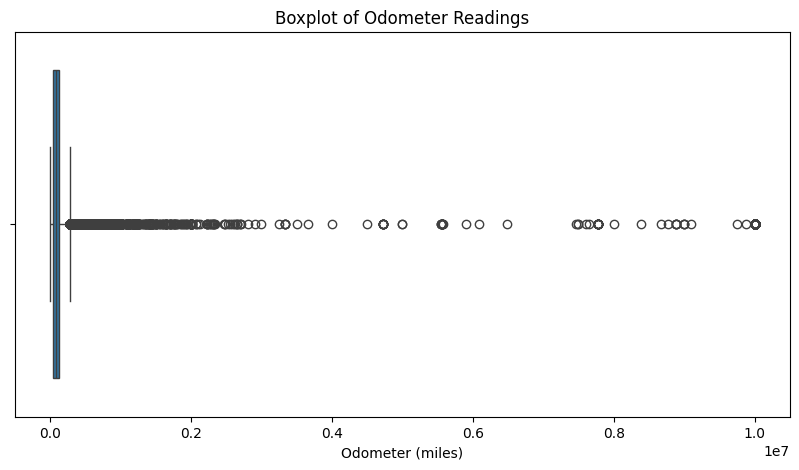

In [ ]:
#check for outliers in Odometer
print("Min odometer:", cars_df1['odometer'].min())
print("Max odometer:", cars_df1['odometer'].max())

plt.figure(figsize=(10, 5))
sns.boxplot(x=cars_df1['odometer'])
plt.title('Boxplot of Odometer Readings')
plt.xlabel('Odometer (miles)')
plt.show()

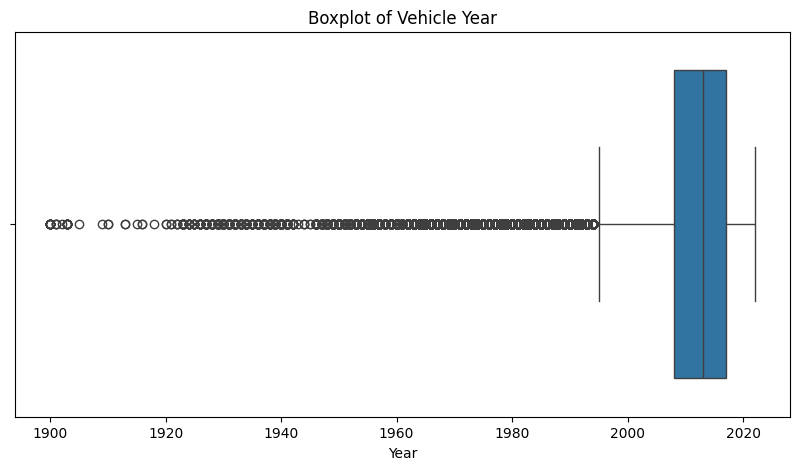

In [ ]:
#check for outliers (year)
plt.figure(figsize=(10, 5))
sns.boxplot(x=cars_df1['year'])
plt.title('Boxplot of Vehicle Year')
plt.xlabel('Year')
plt.show()

In [ ]:
# createing new column 'car_age' for better use in prediction
min_year = cars_df1['year'].min()
max_year = cars_df1['year'].max()

cars_df1 = cars_df1[cars_df1['year'] > 2008].copy()
cars_df1['year'] = 2025 - cars_df1['year'].astype(int)
cars_df1.rename(columns={'year': 'car_age'}, inplace=True)


In [ ]:
selected_columns = [
    'price',
    'car_age',
    'manufacturer',
    'odometer',
    'fuel',
    'transmission',
    'title_status',
    'type',
    'cylinders',
    'drive']

cars_df2 = cars_df1[selected_columns].copy() #New dataset with the selected columns.
cars_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 315293 entries, 27 to 426879
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         315293 non-null  int64  
 1   car_age       315293 non-null  int64  
 2   manufacturer  306636 non-null  object 
 3   odometer      311900 non-null  float64
 4   fuel          312951 non-null  object 
 5   transmission  313331 non-null  object 
 6   title_status  308767 non-null  object 
 7   type          256535 non-null  object 
 8   cylinders     172957 non-null  object 
 9   drive         218848 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 26.5+ MB


In [ ]:
df_c1=cars_df2.copy()
missing_counts = df_c1.isnull().sum() #calculate the number of missing value
missing_ratio = (df_c1.isnull().sum() / len(df_c1)) * 100 #calculate the percentage

missing_df_c1 = pd.DataFrame({'Missing Counts': missing_counts, 'Rate (%)': missing_ratio})
missing_df_c1 = missing_df_c1[missing_df_c1['Missing Counts'] > 0].sort_values(by='Rate (%)', ascending=False)

print("\nMissing Values Information:")
print(missing_df_c1)


Missing Values Information:
              Missing Counts   Rate (%)
cylinders             142336  45.144041
drive                  96445  30.589008
type                   58758  18.635999
manufacturer            8657   2.745700
title_status            6526   2.069821
odometer                3393   1.076142
fuel                    2342   0.742801
transmission            1962   0.622278


In [ ]:
# numerical columns
corr_df = cars_df2[['car_age', 'odometer', 'price']]

# Compute correlation matrix
correlation = corr_df.corr()
print(correlation)

           car_age  odometer     price
car_age   1.000000  0.273302 -0.005532
odometer  0.273302  1.000000 -0.001826
price    -0.005532 -0.001826  1.000000


In [ ]:
cars_df2 = cars_df2[cars_df2['type'].isin(['pickup', 'sedan', 'SUV', 'convertible', 'wagon', 'hatchback', 'coupe'])].copy()
cars_df2 = cars_df2[cars_df2['transmission'].isin(['automatic', 'manual'])].copy()
cars_df2 = cars_df2[cars_df2['title_status'].isin(['clean', 'rebuilt', 'missing', 'parts only'])].copy()

# Handle 'cylinders' missing values and ensure it's numeric
cars_df2['cylinders'] = cars_df2['cylinders'].astype(str).str.extract(r'(\d+)').astype(float)
if cars_df2['cylinders'].isnull().any():
    mode_cylinders = cars_df2['cylinders'].mode()[0]
    cars_df2['cylinders'] = cars_df2['cylinders'].fillna(mode_cylinders)
cars_df2['cylinders'] = cars_df2['cylinders'].astype(int)

cars_df2 = cars_df2[cars_df2['fuel'].isin(['diesel', 'hybrid', 'electric', 'gas'])].copy()
cars_df2 = cars_df2[cars_df2['manufacturer'].notna()].copy()

# Handle 'drive' missing values by filling with mode
if cars_df2['drive'].isnull().any():
    mode_drive = cars_df2['drive'].mode()[0]
    cars_df2['drive'] = cars_df2['drive'].fillna(mode_drive)

cars_df2 = cars_df2[(cars_df2['price'] > 2000) & (cars_df2['price'] <= 60000)].copy()

# Ensure 'odometer' is numeric and handle NaNs if any, before filtering
cars_df2['odometer'] = pd.to_numeric(cars_df2['odometer'], errors='coerce')
cars_df2 = cars_df2.dropna(subset=['odometer']).copy()
cars_df2 = cars_df2[(cars_df2['odometer'] > 1000) & (cars_df2['odometer'] <= 550000)].copy()

cars_df2 = cars_df2[cars_df2['manufacturer'].map(cars_df2['manufacturer'].value_counts()) > 100].copy()


# --- Final Check on Missing Values before Encoding ---
print("\nMissing Values Information after all cleaning:")
missing_counts_final = cars_df2.isnull().sum()
missing_ratio_final = (cars_df2.isnull().sum() / len(cars_df2)) * 100
missing_df_final = pd.DataFrame({'Missing Counts': missing_counts_final, 'Rate (%)': missing_ratio_final})
missing_df_final = missing_df_final[missing_df_final['Missing Counts'] > 0].sort_values(by='Rate (%)', ascending=False)
print(missing_df_final)

# --- Creating log_price as the target variable
# df_final will now include 'log_price' alongside 'price'
df_final = cars_df2.copy()
df_final['log_price'] = np.log(df_final['price']) # Re-introducing log_price here

# --- Categorical to Numerical Transformation (One-Hot Encoding) ---
# Identify categorical columns to encode
# 'price' and 'log_price' are numerical and will not be in 'object' dtype, so they won't be encoded.
categorical_cols_to_encode = [col for col in df_final.columns if df_final[col].dtype == 'object']

print(f"\nColumns to be One-Hot Encoded: {categorical_cols_to_encode}")

# Perform One-Hot Encoding to change the categorical value into numerical format
df_encoded = pd.get_dummies(df_final, columns=categorical_cols_to_encode, drop_first=True)

# --- Final Dataframe Check ---
print("\n--- Final Encoded DataFrame Information ---")
print("Shape of the encoded DataFrame:", df_encoded.shape)
print("First 5 rows of the encoded DataFrame:")
pd.set_option('display.max_columns', None) # Show all columns
print(df_encoded.head())
pd.reset_option('display.max_columns') # Reset display option

print("\nData types of the encoded DataFrame:")
print(df_encoded.info())

#Now df_encoded is ready with 'log_price' as the target


Missing Values Information after all cleaning:
Empty DataFrame
Columns: [Missing Counts, Rate (%)]
Index: []

Columns to be One-Hot Encoded: ['manufacturer', 'fuel', 'transmission', 'title_status', 'type', 'drive']

--- Final Encoded DataFrame Information ---
Shape of the encoded DataFrame: (112863, 53)
First 5 rows of the encoded DataFrame:
     price  car_age  odometer  cylinders  log_price  manufacturer_audi  \
71   26990       11   63129.0          6  10.203222              False   
73   15000        8   90000.0          8   9.615805              False   
131  27990        8   19492.0          6  10.239603              False   
154  24590        7   16081.0          4  10.110095              False   
157  25590        5    1113.0          4  10.149957              False   

     manufacturer_bmw  manufacturer_buick  manufacturer_cadillac  \
71              False               False                  False   
73              False               False                  False   
131   

In [ ]:
print(df_encoded.isnull().sum()) #checking the nul values in final dataset

price                         0
car_age                       0
odometer                      0
cylinders                     0
log_price                     0
manufacturer_audi             0
manufacturer_bmw              0
manufacturer_buick            0
manufacturer_cadillac         0
manufacturer_chevrolet        0
manufacturer_chrysler         0
manufacturer_dodge            0
manufacturer_fiat             0
manufacturer_ford             0
manufacturer_gmc              0
manufacturer_honda            0
manufacturer_hyundai          0
manufacturer_infiniti         0
manufacturer_jaguar           0
manufacturer_jeep             0
manufacturer_kia              0
manufacturer_lexus            0
manufacturer_lincoln          0
manufacturer_mazda            0
manufacturer_mercedes-benz    0
manufacturer_mercury          0
manufacturer_mini             0
manufacturer_mitsubishi       0
manufacturer_nissan           0
manufacturer_pontiac          0
manufacturer_porsche          0
manufact


  FEATURE CORRELATION HEATMAP (AFTER CLEANING & TRANSFORMATION)



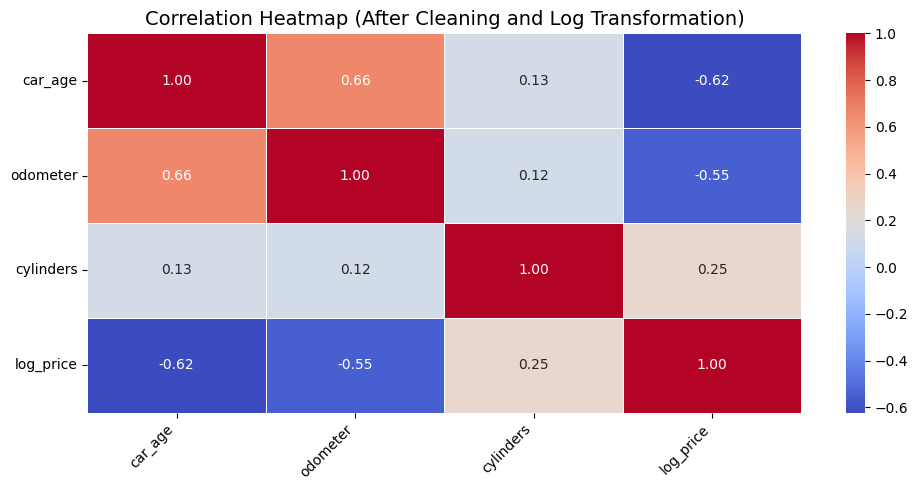

In [ ]:
print("\n" + "="*70)
print("  FEATURE CORRELATION HEATMAP (AFTER CLEANING & TRANSFORMATION)")
print("="*70 + "\n")

correlation_data_cleaned = df_encoded[['car_age', 'odometer', 'cylinders', 'log_price']].copy()
corr_matrix_cleaned = correlation_data_cleaned.corr()
plt.figure(figsize=(10, 5))

# Creating the heatmap
sns.heatmap(corr_matrix_cleaned, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Correlation Heatmap (After Cleaning and Log Transformation)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# SPLITTING THE DATASET INTO TRAINING AND TESTING

In [ ]:
# 1. Re-define X (features) and y (target) with log_price
X = df_encoded.drop(columns=['price', 'log_price'])
y = df_encoded['log_price'] # Target is log_price

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nX_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

# 3. Feature Scaling for numerical features
numerical_cols = ['car_age', 'odometer', 'cylinders']
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("\nNumerical features scaled successfully.")
print("Data preparation complete. Proceed to model training cells.")

Features (X) shape: (112863, 51)
Target (y) shape: (112863,)

X_train shape: (90290, 51)
X_test shape: (22573, 51)

Numerical features scaled successfully.
Data preparation complete. Proceed to model training cells.


# METHODS AND IMPLEMENTATIONS

In [ ]:
y_test_original = np.exp(y_test) #Inverse transform the actual log-price of the test set back to their original dollar scale

print("\n" + "="*50)
print("           LINEAR REGRESSION RESULTS")
print("="*50 + "\n")

print("--- Training Linear Regression Model ---")
lr_model = LinearRegression()
start_time = time.time()
lr_model.fit(X_train, y_train)
end_time = time.time()
print(f"Linear Regression training time: {end_time - start_time:.2f} seconds")

# Predictions
y_pred_lr_log = lr_model.predict(X_test)
y_pred_lr_original = np.exp(y_pred_lr_log)

print("\n--- Linear Regression Evaluation (on log_price) ---")
r2_lr = r2_score(y_test, y_pred_lr_log)
mae_lr_log = mean_absolute_error(y_test, y_pred_lr_log)
rmse_lr_log = np.sqrt(mean_squared_error(y_test, y_pred_lr_log))
print(f"R-squared (log_price): {r2_lr:.4f}")
print(f"Mean Absolute Error (log_price): {mae_lr_log:.4f}")
print(f"Root Mean Squared Error (log_price): {rmse_lr_log:.4f}")

print("\n--- Linear Regression Evaluation (on original price scale) ---")
mae_lr_original = mean_absolute_error(y_test_original, y_pred_lr_original)
rmse_lr_original = np.sqrt(mean_squared_error(y_test_original, y_pred_lr_original))
print(f"Mean Absolute Error (original price): ${mae_lr_original:.2f}")
print(f"Root Mean Squared Error (original price): ${rmse_lr_original:.2f}")

# Examine coefficients for interpretation (for Linear Regression)
print("\nLinear Regression Coefficients (Top 10 Positive & Top 10 Negative):")
coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr_model.coef_})
coefficients_df_sorted = coefficients_df.sort_values(by='Coefficient', ascending=False)
print("--- Top 10 Positive Coefficients ---")
print(coefficients_df_sorted.head(10).to_string()) # .to_string() prevents truncation
print("\n--- Top 10 Negative Coefficients ---")
print(coefficients_df_sorted.tail(10).to_string()) # .to_string() prevents truncation

print("="*50 + "\n")


           LINEAR REGRESSION RESULTS

--- Training Linear Regression Model ---
Linear Regression training time: 0.28 seconds

--- Linear Regression Evaluation (on log_price) ---
R-squared (log_price): 0.7770
Mean Absolute Error (log_price): 0.2160
Root Mean Squared Error (log_price): 0.2913

--- Linear Regression Evaluation (on original price scale) ---
Mean Absolute Error (original price): $3936.27
Root Mean Squared Error (original price): $5982.05

Linear Regression Coefficients (Top 10 Positive & Top 10 Negative):
--- Top 10 Positive Coefficients ---
                       Feature  Coefficient
32          manufacturer_tesla     0.732828
46                 type_pickup     0.424132
28        manufacturer_porsche     0.363109
19          manufacturer_lexus     0.196569
43            type_convertible     0.159150
30          manufacturer_rover     0.153046
2                    cylinders     0.094817
22  manufacturer_mercedes-benz     0.086959
39         transmission_manual     0.064001

In [ ]:
y_test_original = np.exp(y_test)

print("\n" + "="*50)
print("             RIDGECV REGRESSOR RESULTS")
print("="*50 + "\n")

print("--- Training RidgeCV Regressor ---")
# alphas: Array of alpha values for cross-validation
ridge_model = RidgeCV(alphas=np.logspace(-6, 6, 13), cv=5) # Example range, adjust as needed
start_time = time.time()
ridge_model.fit(X_train, y_train)
end_time = time.time()
print(f"RidgeCV training time: {end_time - start_time:.2f} seconds")
print(f"Best alpha found by RidgeCV: {ridge_model.alpha_:.6f}")

# Predictions
y_pred_ridge_log = ridge_model.predict(X_test)
y_pred_ridge_original = np.exp(y_pred_ridge_log)

print("\n--- RidgeCV Evaluation (on log_price) ---")
r2_ridge = r2_score(y_test, y_pred_ridge_log)
mae_ridge_log = mean_absolute_error(y_test, y_pred_ridge_log)
rmse_ridge_log = np.sqrt(mean_squared_error(y_test, y_pred_ridge_log))
print(f"R-squared (log_price): {r2_ridge:.4f}")
print(f"Mean Absolute Error (log_price): {mae_ridge_log:.4f}")
print(f"Root Mean Squared Error (log_price): {rmse_ridge_log:.4f}")

print("\n--- RidgeCV Evaluation (on original price scale) ---")
mae_ridge_original = mean_absolute_error(y_test_original, y_pred_ridge_original)
rmse_ridge_original = np.sqrt(mean_squared_error(y_test_original, y_pred_ridge_original))
print(f"Mean Absolute Error (original price): ${mae_ridge_original:.2f}")
print(f"Root Mean Squared Error (original price): ${rmse_ridge_original:.2f}")
print("="*50 + "\n")


             RIDGECV REGRESSOR RESULTS

--- Training RidgeCV Regressor ---
RidgeCV training time: 8.89 seconds
Best alpha found by RidgeCV: 0.100000

--- RidgeCV Evaluation (on log_price) ---
R-squared (log_price): 0.7770
Mean Absolute Error (log_price): 0.2160
Root Mean Squared Error (log_price): 0.2913

--- RidgeCV Evaluation (on original price scale) ---
Mean Absolute Error (original price): $3936.26
Root Mean Squared Error (original price): $5982.01



In [ ]:
y_test_original = np.exp(y_test)

print("\n" + "="*50)
print("             LASSOCV REGRESSOR RESULTS")
print("="*50 + "\n")

print("--- Training LassoCV Regressor ---")
# alphas: Array of alpha values for cross-validation
# max_iter: Increased for convergence on some datasets
lasso_model = LassoCV(alphas=np.logspace(-6, 6, 13), cv=5, random_state=42, max_iter=10000) # Example range
start_time = time.time()
lasso_model.fit(X_train, y_train)
end_time = time.time()
print(f"LassoCV training time: {end_time - start_time:.2f} seconds")
print(f"Best alpha found by LassoCV: {lasso_model.alpha_:.6f}")

# Predictions
y_pred_lasso_log = lasso_model.predict(X_test)
y_pred_lasso_original = np.exp(y_pred_lasso_log)

print("\n--- LassoCV Evaluation (on log_price) ---")
r2_lasso = r2_score(y_test, y_pred_lasso_log)
mae_lasso_log = mean_absolute_error(y_test, y_pred_lasso_log)
rmse_lasso_log = np.sqrt(mean_squared_error(y_test, y_pred_lasso_log))
print(f"R-squared (log_price): {r2_lasso:.4f}")
print(f"Mean Absolute Error (log_price): {mae_lasso_log:.4f}")
print(f"Root Mean Squared Error (log_price): {rmse_lasso_log:.4f}")

print("\n--- LassoCV Evaluation (on original price scale) ---")
mae_lasso_original = mean_absolute_error(y_test_original, y_pred_lasso_original)
rmse_lasso_original = np.sqrt(mean_squared_error(y_test_original, y_pred_lasso_original))
print(f"Mean Absolute Error (original price): ${mae_lasso_original:.2f}")
print(f"Root Mean Squared Error (original price): ${rmse_lasso_original:.2f}")
print("="*50 + "\n")


             LASSOCV REGRESSOR RESULTS

--- Training LassoCV Regressor ---
LassoCV training time: 6.70 seconds
Best alpha found by LassoCV: 0.000001

--- LassoCV Evaluation (on log_price) ---
R-squared (log_price): 0.7770
Mean Absolute Error (log_price): 0.2160
Root Mean Squared Error (log_price): 0.2913

--- LassoCV Evaluation (on original price scale) ---
Mean Absolute Error (original price): $3936.22
Root Mean Squared Error (original price): $5981.95



In [ ]:
y_test_original = np.exp(y_test) #Inverse transform the actual log-price of the test set back to their original dollar scale
print("\n" + "="*50)
print("         RANDOM FOREST REGRESSOR RESULTS")
print("="*50 + "\n")

print("--- Training Random Forest Regressor ---")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
# n_estimators=100: Specifies the number of decision trees in the forest. More trees generally improve performance but increase computation time.
# random_state=42: Ensures reproducibility of the results.
# n_jobs=-1: Utilizes all available CPU cores for faster training.
start_time = time.time()
rf_model.fit(X_train, y_train)
end_time = time.time()
print(f"Random Forest training time: {end_time - start_time:.2f} seconds")

# Predictions
y_pred_rf_log = rf_model.predict(X_test)
y_pred_rf_original = np.exp(y_pred_rf_log)

print("\n--- Random Forest Evaluation (on log_price) ---")
r2_rf = r2_score(y_test, y_pred_rf_log)
mae_rf_log = mean_absolute_error(y_test, y_pred_rf_log)
rmse_rf_log = np.sqrt(mean_squared_error(y_test, y_pred_rf_log))
print(f"R-squared (log_price): {r2_rf:.4f}")
print(f"Mean Absolute Error (log_price): {mae_rf_log:.4f}")
print(f"Root Mean Squared Error (log_price): {rmse_rf_log:.4f}")

print("\n--- Random Forest Evaluation (on original price scale) ---")
mae_rf_original = mean_absolute_error(y_test_original, y_pred_rf_original)
rmse_rf_original = np.sqrt(mean_squared_error(y_test_original, y_pred_rf_original))
print(f"Mean Absolute Error (original price): ${mae_rf_original:.2f}")
print(f"Root Mean Squared Error (original price): ${rmse_rf_original:.2f}")
print("="*50 + "\n")


         RANDOM FOREST REGRESSOR RESULTS

--- Training Random Forest Regressor ---
Random Forest training time: 7.08 seconds

--- Random Forest Evaluation (on log_price) ---
R-squared (log_price): 0.8824
Mean Absolute Error (log_price): 0.1209
Root Mean Squared Error (log_price): 0.2115

--- Random Forest Evaluation (on original price scale) ---
Mean Absolute Error (original price): $1891.24
Root Mean Squared Error (original price): $3496.41



In [ ]:
print("\n" + "="*50)
print("       RANDOM FOREST REGRESSOR TUNING")
print("="*50 + "\n")

param_dist = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'max_features': ['sqrt', 'log2', 0.6, 0.8, 1.0], # Added numerical fractions
    'max_depth': [10, 20, 30, 40, 50, None], # None means full depth
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Creating a Random Forest Regressor instance
rf_base = RandomForestRegressor(random_state=42)

# Seting up RandomizedSearchCV
# n_iter: Number of parameter settings that are sampled. More is better but slower.
# cv: Number of cross-validation folds.
# verbose: Controls the verbosity: higher means more messages.
# n_jobs: Number of jobs to run in parallel. -1 means using all processors.
random_search = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist,
    n_iter=50,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring='neg_mean_absolute_error'
)

print("--- Starting Randomized Search for Random Forest ---")
start_time = time.time()
random_search.fit(X_train, y_train)
end_time = time.time()
print(f"Randomized Search training time: {end_time - start_time:.2f} seconds")

print("\nBest parameters found by Randomized Search:")
print(random_search.best_params_)
print(f"Best cross-validation MAE (log_price): {-random_search.best_score_:.4f}") # Convert back to positive MAE

# Using the best estimator found by Randomized Search
best_rf_model = random_search.best_estimator_

# Evaluating the best model on the test set
y_pred_rf_log = best_rf_model.predict(X_test)
y_pred_rf_original = np.exp(y_pred_rf_log)
y_test_original = np.exp(y_test)

print("\n--- Tuned Random Forest Evaluation (on log_price) ---")
r2_rf_tuned = r2_score(y_test, y_pred_rf_log)
mae_rf_log_tuned = mean_absolute_error(y_test, y_pred_rf_log)
rmse_rf_log_tuned = np.sqrt(mean_squared_error(y_test, y_pred_rf_log))
print(f"R-squared (log_price): {r2_rf_tuned:.4f}")
print(f"Mean Absolute Error (log_price): {mae_rf_log_tuned:.4f}")
print(f"Root Mean Squared Error (log_price): {rmse_rf_log_tuned:.4f}")

print("\n--- Tuned Random Forest Evaluation (on original price scale) ---")
mae_rf_original_tuned = mean_absolute_error(y_test_original, y_pred_rf_original)
rmse_rf_original_tuned = np.sqrt(mean_squared_error(y_test_original, y_pred_rf_original))
print(f"Mean Absolute Error (original price): ${mae_rf_original_tuned:.2f}")
print(f"Root Mean Squared Error (original price): ${rmse_rf_original_tuned:.2f}")
print("="*50 + "\n")


       RANDOM FOREST REGRESSOR TUNING

--- Starting Randomized Search for Random Forest ---
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Randomized Search training time: 3457.92 seconds

Best parameters found by Randomized Search:
{'n_estimators': 700, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.8, 'max_depth': None, 'bootstrap': False}
Best cross-validation MAE (log_price): 0.1266

--- Tuned Random Forest Evaluation (on log_price) ---
R-squared (log_price): 0.8711
Mean Absolute Error (log_price): 0.1128
Root Mean Squared Error (log_price): 0.2214

--- Tuned Random Forest Evaluation (on original price scale) ---
Mean Absolute Error (original price): $1717.04
Root Mean Squared Error (original price): $3586.50



In [ ]:
y_test_original = np.exp(y_test) #Inverse transform the actual log-price of the test set back to their original dollar scale

print("\n" + "="*50)
print("     SCIKIT-LEARN GRADIENT BOOSTING REGRESSOR RESULTS")
print("="*50 + "\n")

print("--- Training Gradient Boosting Regressor (Scikit-learn GBR) ---")
gbr_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
start_time = time.time()
gbr_model.fit(X_train, y_train)
end_time = time.time()
print(f"Gradient Boosting training time: {end_time - start_time:.2f} seconds")

# Predictions
y_pred_gbr_log = gbr_model.predict(X_test)
y_pred_gbr_original = np.exp(y_pred_gbr_log)

print("\n--- Gradient Boosting Regressor Evaluation (on log_price) ---")
r2_gbr = r2_score(y_test, y_pred_gbr_log)
mae_gbr_log = mean_absolute_error(y_test, y_pred_gbr_log)
rmse_gbr_log = np.sqrt(mean_squared_error(y_test, y_pred_gbr_log))
print(f"R-squared (log_price): {r2_gbr:.4f}")
print(f"Mean Absolute Error (log_price): {mae_gbr_log:.4f}")
print(f"Root Mean Squared Error (log_price): {rmse_gbr_log:.4f}")

print("\n--- Gradient Boosting Regressor Evaluation (on original price scale) ---")
mae_gbr_original = mean_absolute_error(y_test_original, y_pred_gbr_original)
rmse_gbr_original = np.sqrt(mean_squared_error(y_test_original, y_pred_gbr_original))
print(f"Mean Absolute Error (original price): ${mae_gbr_original:.2f}")
print(f"Root Mean Squared Error (original price): ${rmse_gbr_original:.2f}")
print("="*50 + "\n")


     SCIKIT-LEARN GRADIENT BOOSTING REGRESSOR RESULTS

--- Training Gradient Boosting Regressor (Scikit-learn GBR) ---
Gradient Boosting training time: 10.65 seconds

--- Gradient Boosting Regressor Evaluation (on log_price) ---
R-squared (log_price): 0.7895
Mean Absolute Error (log_price): 0.2083
Root Mean Squared Error (log_price): 0.2830

--- Gradient Boosting Regressor Evaluation (on original price scale) ---
Mean Absolute Error (original price): $3658.67
Root Mean Squared Error (original price): $5441.65



In [ ]:
y_test_original = np.exp(y_test) #Inverse transform the actual log-price of the test set back to their original dollar scale

print("\n" + "="*50)
print("           XGBOOST REGRESSOR RESULTS")
print("="*50 + "\n")

print("--- Training XGBoost Regressor ---")
xgb_model = XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1, tree_method='hist', eval_metric='rmse')
# tree_method='hist': Uses the approximate histogram-based algorithm for tree construction, which is often faster and
# more memory-efficient for large datasets compared to the exact greedy algorithm.
# eval_metric='rmse': Sets the evaluation metric that will be used for validation during training.
start_time = time.time()
xgb_model.fit(X_train, y_train)
end_time = time.time()
print(f"XGBoost training time: {end_time - start_time:.2f} seconds")

# Predictions
y_pred_xgb_log = xgb_model.predict(X_test)
y_pred_xgb_original = np.exp(y_pred_xgb_log)

print("\n--- XGBoost Regressor Evaluation (on log_price) ---")
r2_xgb = r2_score(y_test, y_pred_xgb_log)
mae_xgb_log = mean_absolute_error(y_test, y_pred_xgb_log)
rmse_xgb_log = np.sqrt(mean_squared_error(y_test, y_pred_xgb_log))
print(f"R-squared (log_price): {r2_xgb:.4f}")
print(f"Mean Absolute Error (log_price): {mae_xgb_log:.4f}")
print(f"Root Mean Squared Error (log_price): {rmse_xgb_log:.4f}")

print("\n--- XGBoost Regressor Evaluation (on original price scale) ---")
mae_xgb_original = mean_absolute_error(y_test_original, y_pred_xgb_original)
rmse_xgb_original = np.sqrt(mean_squared_error(y_test_original, y_pred_xgb_original))
print(f"Mean Absolute Error (original price): ${mae_xgb_original:.2f}")
print(f"Root Mean Squared Error (original price): ${rmse_xgb_original:.2f}")
print("="*50 + "\n")


           XGBOOST REGRESSOR RESULTS

--- Training XGBoost Regressor ---
XGBoost training time: 0.72 seconds

--- XGBoost Regressor Evaluation (on log_price) ---
R-squared (log_price): 0.8465
Mean Absolute Error (log_price): 0.1726
Root Mean Squared Error (log_price): 0.2416

--- XGBoost Regressor Evaluation (on original price scale) ---
Mean Absolute Error (original price): $2948.20
Root Mean Squared Error (original price): $4415.52



In [ ]:
y_test_original = np.exp(y_test) #Inverse transform the actual log-price of the test set back to their original dollar scale

print("\n" + "="*50)
print("     GRIDSEARCHCV FOR GRADIENT BOOSTING REGRESSOR RESULTS")
print("="*50 + "\n")

print("--- GridSearchCV for Gradient Boosting Regressor (Hyperparameter Tuning) ---")
param_grid_gbr = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.05],
    'max_depth': [3, 5],
}
# n-estimators: Defines the range of values for the 'n_estimators' hyperparameter (number of boosting stages/trees) to be searched.
# learning rate:  Defines the range of values for the 'learning_rate' hyperparameter (shrinkage factor applied to each tree's contribution) to be searched.
#max depth:  Defines the range of values for the 'max_depth' hyperparameter (maximum depth of individual trees) to be searched.

gbr_grid = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42),
                        param_grid=param_grid_gbr,
                        cv=3,
                        scoring='neg_mean_squared_error',
                        verbose=2,
                        n_jobs=-1)
#param_grid=param_grid_gbr: Provides the dictionary of hyperparameters and their values to be searched.
# cv=3: Sets the number of folds for cross-validation. The training data will be split into 3 folds, and the model will be trained and evaluated 3 times for each parameter combination.
# scoring='neg_mean_squared_error': Defines the metric to optimize during the search.
# 'neg_mean_squared_error' is used because GridSearchCV aims to maximize the score, so the negative of MSE (which we want to minimize) is provided.
# verbose=2: Controls the verbosity of the output. A value of 2 means it will print messages for each fit.
# n_jobs=-1: Specifies to use all available CPU cores for parallel processing, significantly speeding up the grid search process.

start_time = time.time()
gbr_grid.fit(X_train, y_train)
end_time = time.time()
print(f"GridSearchCV training time: {end_time - start_time:.2f} seconds")

best_gbr_model = gbr_grid.best_estimator_
print(f"\nBest parameters for Gradient Boosting: {gbr_grid.best_params_}")
print(f"Best cross-validation score (negative MSE): {gbr_grid.best_score_:.4f}")

# Make predictions with the best model
y_pred_gbr_tuned_log = best_gbr_model.predict(X_test)
y_pred_gbr_tuned_original = np.exp(y_pred_gbr_tuned_log)

# Evaluate the best model
print("\n--- Tuned Gradient Boosting Regressor Evaluation (on log_price) ---")
r2_gbr_tuned = r2_score(y_test, y_pred_gbr_tuned_log)
mae_gbr_tuned_log = mean_absolute_error(y_test, y_pred_gbr_tuned_log)
rmse_gbr_tuned_log = np.sqrt(mean_squared_error(y_test, y_pred_gbr_tuned_log))
print(f"R-squared (log_price): {r2_gbr_tuned:.4f}")
print(f"Mean Absolute Error (log_price): {mae_gbr_tuned_log:.4f}")
print(f"Root Mean Squared Error (log_price): {rmse_gbr_tuned_log:.4f}")

print("\n--- Tuned Gradient Boosting Regressor Evaluation (on original price scale) ---")
mae_gbr_tuned_original = mean_absolute_error(y_test_original, y_pred_gbr_tuned_original)
rmse_gbr_tuned_original = np.sqrt(mean_squared_error(y_test_original, y_pred_gbr_tuned_original))
print(f"Mean Absolute Error (original price): ${mae_gbr_tuned_original:.2f}")
print(f"Root Mean Squared Error (original price): ${rmse_gbr_tuned_original:.2f}")
print("="*50 + "\n")


     GRIDSEARCHCV FOR GRADIENT BOOSTING REGRESSOR RESULTS

--- GridSearchCV for Gradient Boosting Regressor (Hyperparameter Tuning) ---
Fitting 3 folds for each of 8 candidates, totalling 24 fits
GridSearchCV training time: 131.11 seconds

Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best cross-validation score (negative MSE): -0.0622

--- Tuned Gradient Boosting Regressor Evaluation (on log_price) ---
R-squared (log_price): 0.8364
Mean Absolute Error (log_price): 0.1801
Root Mean Squared Error (log_price): 0.2494

--- Tuned Gradient Boosting Regressor Evaluation (on original price scale) ---
Mean Absolute Error (original price): $3113.07
Root Mean Squared Error (original price): $4636.85



In [ ]:
y_test_original = np.exp(y_test)

print("\n" + "="*50)
print("             LIGHTGBM REGRESSOR RESULTS")
print("="*50 + "\n")

print("--- Training LightGBM Regressor ---")
lgb_model = lgb.LGBMRegressor(n_estimators=100, random_state=42, n_jobs=-1)
start_time = time.time()
lgb_model.fit(X_train, y_train)
end_time = time.time()
print(f"LightGBM training time: {end_time - start_time:.2f} seconds")

# Predictions
y_pred_lgb_log = lgb_model.predict(X_test)
y_pred_lgb_original = np.exp(y_pred_lgb_log)

print("\n--- LightGBM Evaluation (on log_price) ---")
r2_lgb = r2_score(y_test, y_pred_lgb_log)
mae_lgb_log = mean_absolute_error(y_test, y_pred_lgb_log)
rmse_lgb_log = np.sqrt(mean_squared_error(y_test, y_pred_lgb_log))
print(f"R-squared (log_price): {r2_lgb:.4f}")
print(f"Mean Absolute Error (log_price): {mae_lgb_log:.4f}")
print(f"Root Mean Squared Error (log_price): {rmse_lgb_log:.4f}")

print("\n--- LightGBM Evaluation (on original price scale) ---")
mae_lgb_original = mean_absolute_error(y_test_original, y_pred_lgb_original)
rmse_lgb_original = np.sqrt(mean_squared_error(y_test_original, y_pred_lgb_original))
print(f"Mean Absolute Error (original price): ${mae_lgb_original:.2f}")
print(f"Root Mean Squared Error (original price): ${rmse_lgb_original:.2f}")
print("="*50 + "\n")


             LIGHTGBM REGRESSOR RESULTS

--- Training LightGBM Regressor ---
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004046 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 369
[LightGBM] [Info] Number of data points in the train set: 90290, number of used features: 49
[LightGBM] [Info] Start training from score 9.654299
LightGBM training time: 0.69 seconds

--- LightGBM Evaluation (on log_price) ---
R-squared (log_price): 0.8328
Mean Absolute Error (log_price): 0.1820
Root Mean Squared Error (log_price): 0.2522

--- LightGBM Evaluation (on original price scale) ---
Mean Absolute Error (original price): $3148.37
Root Mean Squared Error (original price): $4684.75



In [ ]:
y_test_original = np.exp(y_test)

print("\n" + "="*50)
print("             CATBOOST REGRESSOR RESULTS")
print("="*50 + "\n")

print("--- Training CatBoost Regressor ---")
# CatBoost can handle categorical features directly if we tell it which columns are categorical.
# However, since we've already one-hot encoded them, we'll treat all X as numerical.
# categorical column names to cat_features parameter.
cat_model = CatBoostRegressor(n_estimators=100, random_state=42, verbose=0)
start_time = time.time()
cat_model.fit(X_train, y_train)
end_time = time.time()
print(f"CatBoost training time: {end_time - start_time:.2f} seconds")

# Predictions
y_pred_cat_log = cat_model.predict(X_test)
y_pred_cat_original = np.exp(y_pred_cat_log)

print("\n--- CatBoost Evaluation (on log_price) ---")
r2_cat = r2_score(y_test, y_pred_cat_log)
mae_cat_log = mean_absolute_error(y_test, y_pred_cat_log)
rmse_cat_log = np.sqrt(mean_squared_error(y_test, y_pred_cat_log))
print(f"R-squared (log_price): {r2_cat:.4f}")
print(f"Mean Absolute Error (log_price): {mae_cat_log:.4f}")
print(f"Root Mean Squared Error (log_price): {rmse_cat_log:.4f}")

print("\n--- CatBoost Evaluation (on original price scale) ---")
mae_cat_original = mean_absolute_error(y_test_original, y_pred_cat_original)
rmse_cat_original = np.sqrt(mean_squared_error(y_test_original, y_pred_cat_original))
print(f"Mean Absolute Error (original price): ${mae_cat_original:.2f}")
print(f"Root Mean Squared Error (original price): ${rmse_cat_original:.2f}")
print("="*50 + "\n")


             CATBOOST REGRESSOR RESULTS

--- Training CatBoost Regressor ---
CatBoost training time: 2.85 seconds

--- CatBoost Evaluation (on log_price) ---
R-squared (log_price): 0.8428
Mean Absolute Error (log_price): 0.1748
Root Mean Squared Error (log_price): 0.2445

--- CatBoost Evaluation (on original price scale) ---
Mean Absolute Error (original price): $2996.68
Root Mean Squared Error (original price): $4488.08



In [ ]:
y_test_original = np.exp(y_test) #Inverse transform the actual log-price of the test set back to their original dollar scale

print("\n" + "="*50)
print("             STACKING REGRESSOR RESULTS")
print("="*50 + "\n")

estimators = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)),
    ('gbr', GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1, tree_method='hist', eval_metric='rmse'))

]

final_estimator = LinearRegression() # Or RidgeCV(), etc.

stack_model = StackingRegressor(
    estimators=estimators,
    final_estimator=final_estimator,
    cv=3, # Use cross-validation to prevent overfitting of the meta-learner
    n_jobs=-1,
    verbose=1
)

print("--- Training Stacking Regressor ---")
start_time = time.time()
stack_model.fit(X_train, y_train)
end_time = time.time()
print(f"Stacking Regressor training time: {end_time - start_time:.2f} seconds")

# Predictions
y_pred_stack_log = stack_model.predict(X_test)
y_pred_stack_original = np.exp(y_pred_stack_log)

print("\n--- Stacking Regressor Evaluation (on log_price) ---")
r2_stack = r2_score(y_test, y_pred_stack_log)
mae_stack_log = mean_absolute_error(y_test, y_pred_stack_log)
rmse_stack_log = np.sqrt(mean_squared_error(y_test, y_pred_stack_log))
print(f"R-squared (log_price): {r2_stack:.4f}")
print(f"Mean Absolute Error (log_price): {mae_stack_log:.4f}")
print(f"Root Mean Squared Error (log_price): {rmse_stack_log:.4f}")

print("\n--- Stacking Regressor Evaluation (on original price scale) ---")
mae_stack_original = mean_absolute_error(y_test_original, y_pred_stack_original)
rmse_stack_original = np.sqrt(mean_squared_error(y_test_original, y_pred_stack_original))
print(f"Mean Absolute Error (original price): ${mae_stack_original:.2f}")
print(f"Root Mean Squared Error (original price): ${rmse_stack_original:.2f}")
print("="*50 + "\n")


             STACKING REGRESSOR RESULTS

--- Training Stacking Regressor ---
Stacking Regressor training time: 61.39 seconds

--- Stacking Regressor Evaluation (on log_price) ---
R-squared (log_price): 0.8880
Mean Absolute Error (log_price): 0.1328
Root Mean Squared Error (log_price): 0.2064

--- Stacking Regressor Evaluation (on original price scale) ---
Mean Absolute Error (original price): $2162.06
Root Mean Squared Error (original price): $3497.35

